In [2]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
housing = pd.read_csv('data/housing.csv', index_col=0)
pd.set_option('display.max_columns', 20)
housing.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
PID,,,,,,,,,,,,,,,,,,,,,
909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,3,...,14090.0,1036620.0,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,4,...,11300.0,872772.0,77236.460177,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735
911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,4,...,14090.0,1036620.0,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
535377150,1039,114000,80.000000,8146,4,8,1900,2003,0.0,4,...,14090.0,1036620.0,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
534177230,1665,227000,70.000000,8400,8,6,2001,2001,0.0,4,...,14090.0,1036620.0,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166


In [4]:
#housing_v2 = pd.read_csv('housing_v2.csv', index_col=0)
#pd.set_option('display.max_columns', 20)
#housing_v2.head()

In [5]:
housing.shape

(2582, 269)

In [6]:
housing.head()

,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax
PID,,,,,,,,,,,,,,,,,,,,,
909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,3,...,14090.0,1036620.0,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,4,...,11300.0,872772.0,77236.460177,0.020427,0.013274,0.131858,0.036921,0.111504,0.006293,0.001735
911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,4,...,14090.0,1036620.0,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
535377150,1039,114000,80.000000,8146,4,8,1900,2003,0.0,4,...,14090.0,1036620.0,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166
534177230,1665,227000,70.000000,8400,8,6,2001,2001,0.0,4,...,14090.0,1036620.0,73571.327182,0.021309,0.011356,0.134138,0.052438,0.107168,0.006404,0.002166


[Text(0.5, 1.0, 'OverallQual vs. SP Boxplot (with Outlier)')]

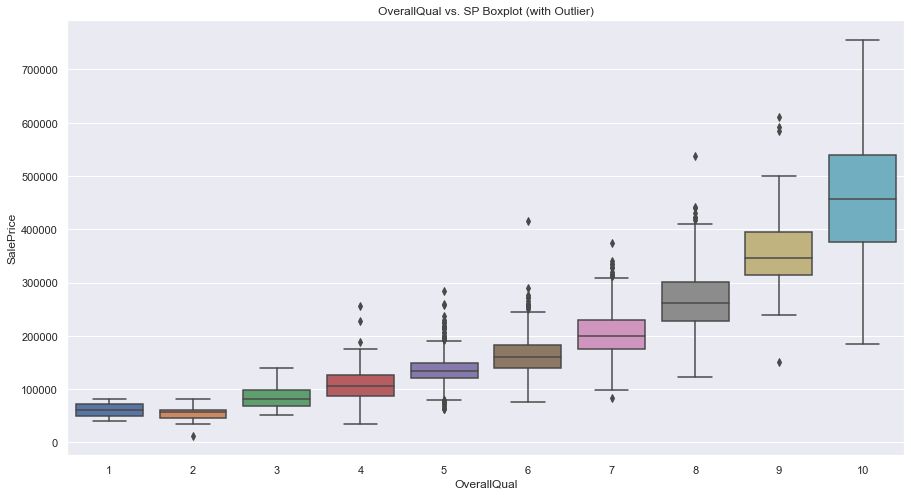

In [7]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='OverallQual', y='SalePrice', data=housing).set(title = "OverallQual vs. SP Boxplot (with Outlier)")

[Text(0.5, 1.0, 'The House Price per Square Footage (with Outlier)')]

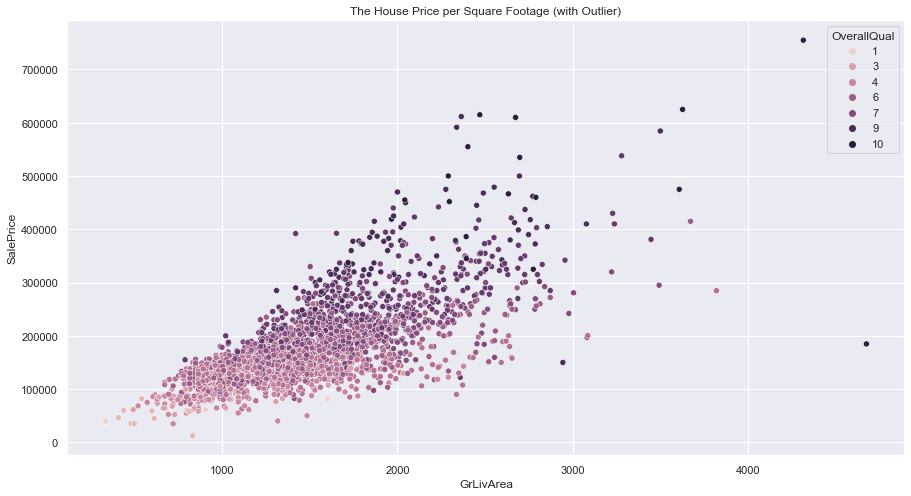

In [8]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = housing, 
                x = 'GrLivArea',  
                y = 'SalePrice', 
                hue = 'OverallQual').set(title = "The House Price per Square Footage (with Outlier)")

### combine quality and condition by averaging the score

In [9]:
housing['avg_Overall_Qual_Cond'] = housing[['OverallQual', 'OverallCond']].mean(axis=1)
housing['avg_Exter_Qual_Cond'] = housing[['ExterQual','ExterCond']].mean(axis=1)
housing['avg_Bsmt_Qual_Cond'] = housing[['BsmtQual','BsmtCond']].mean(axis=1)
housing['avg_Garage_Qual_Cond'] = housing[['GarageQual','GarageCond']].mean(axis=1)

In [10]:
# Drop individual columns
housing.drop(['OverallQual', 'OverallCond',
             'ExterQual','ExterCond',
             'BsmtQual','BsmtCond',
             'GarageQual','GarageCond'], axis=1, inplace=True)

### zoning is based on residential vs non residential

In [11]:
housing['MSZoning_R'] = housing['MSZoning_FV'] + housing['MSZoning_RL'] + housing['MSZoning_RH'] +  housing['MSZoning_RM'] != 0 

In [12]:
housing.drop(['MSZoning_FV', 'MSZoning_RL','MSZoning_A (agr)','MSZoning_C (all)',
             'MSZoning_RH','MSZoning_RM','MSZoning_I (all)'], axis=1, inplace=True)

### MS Subclass does not provide additional info

In [13]:
housing.drop(['MSSubClass_20','MSSubClass_30','MSSubClass_40','MSSubClass_45',
              'MSSubClass_50','MSSubClass_60','MSSubClass_70','MSSubClass_75',
              'MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',
              'MSSubClass_150','MSSubClass_160','MSSubClass_180','MSSubClass_190'], axis=1, inplace=True)

### we can use dummy features that provide sufficient data to separate classes

In [14]:
#Street_Grvl Street_Pave
# Drop individual columns
housing.drop(['Street_Grvl','Street_Pave'], axis=1, inplace=True)

In [15]:
#Alley_Grvl	Alley_NA Alley_Pave
housing.drop(['Alley_Grvl','Alley_NA','Alley_Pave'], axis=1, inplace=True)

In [16]:
#LandContour_Bnk LandContour_HLS	LandContour_Low	LandContour_Lvl
housing.drop(['LandContour_Bnk','LandContour_HLS','LandContour_Low','LandContour_Lvl'], axis=1, inplace=True)

In [17]:
#Utilities_AllPub	Utilities_NoSewr
housing.drop(['Utilities_AllPub','Utilities_NoSewr'], axis=1, inplace=True)

In [18]:
#LandSlope_Gtl	LandSlope_Mod	LandSlope_Sev
housing.drop(['LandSlope_Gtl','LandSlope_Mod','LandSlope_Sev'], axis=1, inplace=True)

### Only keep regular shaped lots LotShape_Reg 

In [19]:
#LotShape_IR1 LotShape_IR2 LotShape_IR3
housing.drop(['LotShape_IR1','LotShape_IR2','LotShape_IR3'], axis=1, inplace=True)

### Only keep corner and culDsac properties 

In [20]:
#LotConfig_FR2 LotConfig_FR3 LotConfig_Inside
housing.drop(['LotConfig_FR2','LotConfig_FR3','LotConfig_Inside'], axis=1, inplace=True)

### Only Keep Brick and Stone Dummies

In [21]:
#MasVnrType_BrkCmn MasVnrType_None
housing.drop(['MasVnrType_BrkCmn','MasVnrType_None'], axis=1, inplace=True)

### Only Keep Foundation_CBlock and Foundation_PConc Dummies

In [22]:
#Foundation_BrkTil Foundation_Slab Foundation_Stone Foundation_Wood
housing.drop(['Foundation_BrkTil','Foundation_Slab',
             'Foundation_Stone','Foundation_Wood'], axis=1, inplace=True)

### Only Keep Central AC

In [23]:
housing.drop(['CentralAir_N'], axis=1, inplace=True)

### Only Keep Electrical_SBrkr

In [24]:
#Electrical_FuseA	Electrical_FuseF	Electrical_FuseP	Electrical_Mix
housing.drop(['Electrical_FuseA','Electrical_FuseF',
             'Electrical_FuseP','Electrical_Mix'], axis=1, inplace=True)

### Only keep Attached, Detached and Built in Garages

In [25]:
#GarageType_2Types	GarageType_Basment	GarageType_CarPort	GarageType_NA	
#GarageFinish_Fin	GarageFinish_NA	GarageFinish_RFn	GarageFinish_Unf
housing.drop(['GarageType_2Types','GarageType_Basment','GarageType_CarPort',
             'GarageType_NA','GarageFinish_Fin','GarageFinish_NA',
              'GarageFinish_RFn','GarageFinish_Unf'], axis=1, inplace=True)

### Keep neighborhoods that have more than 100 properties 

In [26]:
housing.drop(['Neighborhood_Crawfor',
'Neighborhood_IDOTRR',
'Neighborhood_NoRidge',
'Neighborhood_Timber',
'Neighborhood_StoneBr',
'Neighborhood_SWISU',
'Neighborhood_ClearCr',
'Neighborhood_MeadowV',
'Neighborhood_BrDale',
'Neighborhood_Blmngtn',
'Neighborhood_Veenker',
'Neighborhood_NPkVill',
'Neighborhood_Blueste',
'Neighborhood_Greens',
'Neighborhood_GrnHill',
'Neighborhood_Landmrk'], axis=1, inplace=True)


### drop columns that don't provide useful information

In [27]:
#rename normal sales
housing['Normal_Sale']=housing['SaleCondition_Normal']

In [28]:
housing.drop(list(housing.filter(regex = 'Condition')), axis = 1, inplace = True)

In [29]:
housing.drop(list(housing.filter(regex = 'Roof')), axis = 1, inplace = True)

In [30]:
housing.drop(list(housing.filter(regex = 'Exterior1')), axis = 1, inplace = True)

In [31]:
housing.drop(list(housing.filter(regex = 'Exterior2')), axis = 1, inplace = True)

In [32]:
#Heating_
housing.drop(list(housing.filter(regex = 'Heating_')), axis = 1, inplace = True)

In [33]:
#PavedDrive_
housing.drop(list(housing.filter(regex = 'PavedDrive_')), axis = 1, inplace = True)

In [34]:
#MiscFeature_
housing.drop(list(housing.filter(regex = 'MiscFeature_')), axis = 1, inplace = True)

In [35]:
#SaleType_
housing.drop(list(housing.filter(regex = 'SaleType_')), axis = 1, inplace = True)

In [36]:
#GLA
housing.drop(['GLA'], axis=1, inplace=True)

In [37]:
housing.shape

(2582, 97)

In [38]:
housing.columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_Sa

[Text(0.5, 1.0, 'OverallQual vs. SP Boxplot (without Outlier)')]

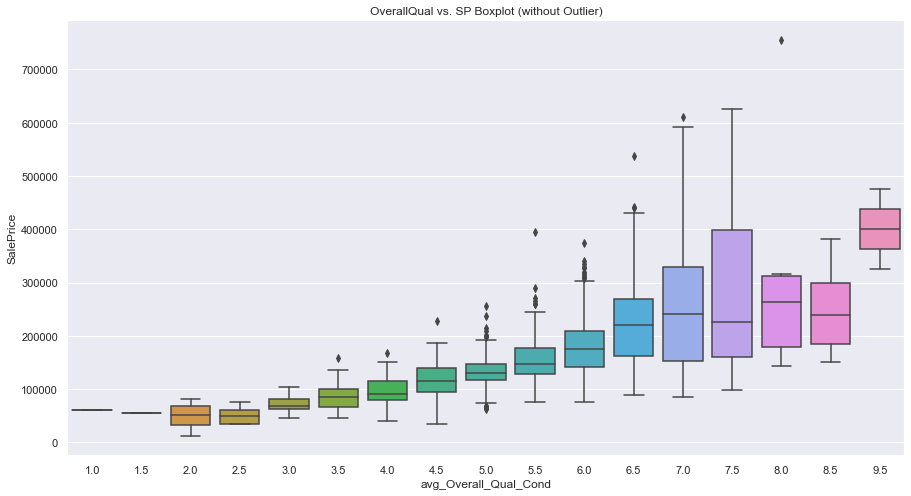

In [39]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='avg_Overall_Qual_Cond', y='SalePrice', data=housing).set(title = "OverallQual vs. SP Boxplot (without Outlier)")

[Text(0.5, 1.0, 'The House Price per Square Footage without Outlier')]

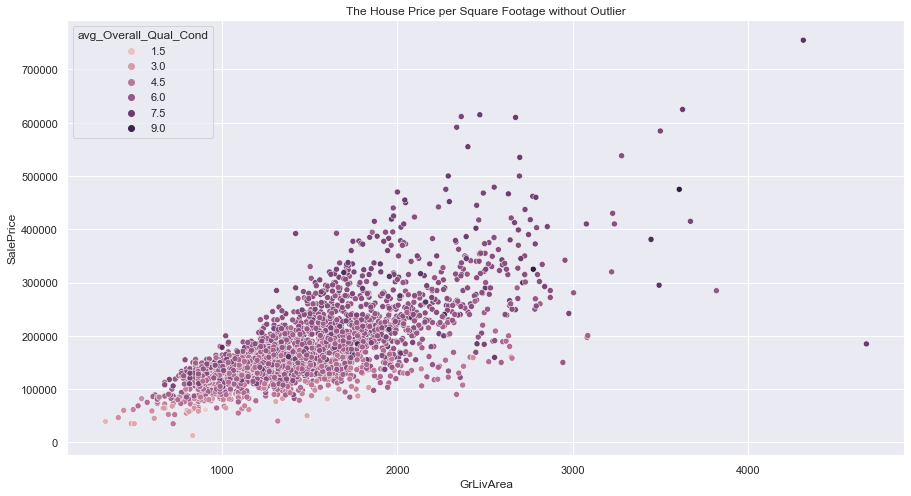

In [40]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = housing, 
                x = 'GrLivArea',  
                y = 'SalePrice', 
                hue = 'avg_Overall_Qual_Cond').set(title = "The House Price per Square Footage without Outlier")

### Outlier Detection and Treatment

In [41]:
# Select the columns for outlier detection
cols = ['GrLivArea', 'SalePrice', 'LotArea']

# Calculate z-score for each column
z_scores = np.abs(zscore(housing[cols]))

# Set threshold for z-score
threshold = 3

# Find rows with z-score greater than threshold
outliers = np.where(z_scores > threshold)

In [42]:
df = housing.drop(housing.index[outliers[0]])

In [43]:
df.columns

Index(['GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'MoSold', 'YrSold', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer',
       'Neighborhood_Sa

In [44]:
#housing[housing['outlier'] != -1]

In [45]:
housing.shape

(2582, 97)

In [46]:
df.shape

(2511, 97)

[Text(0.5, 1.0, 'OverallQual vs. SP Boxplot (without Outlier)')]

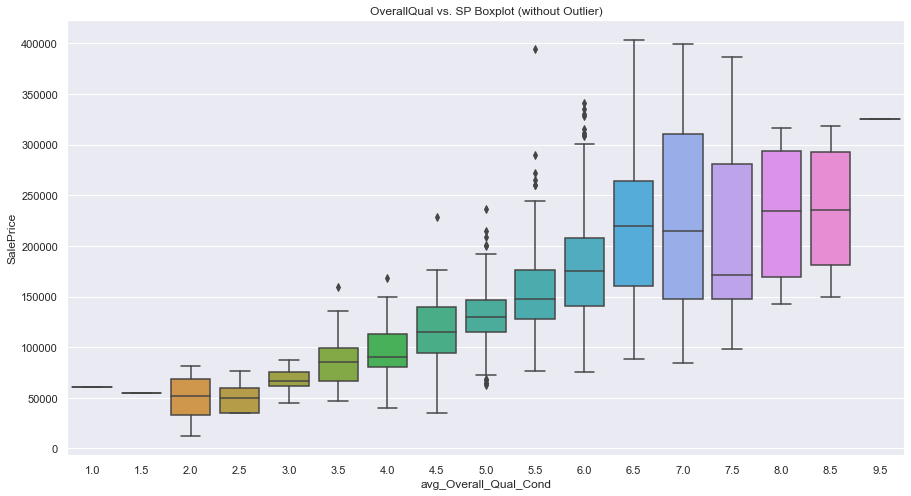

In [47]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.boxplot(x='avg_Overall_Qual_Cond', y='SalePrice', data=df).set(title = "OverallQual vs. SP Boxplot (without Outlier)")

[Text(0.5, 1.0, 'The House Price per Square Footage (without Outlier)')]

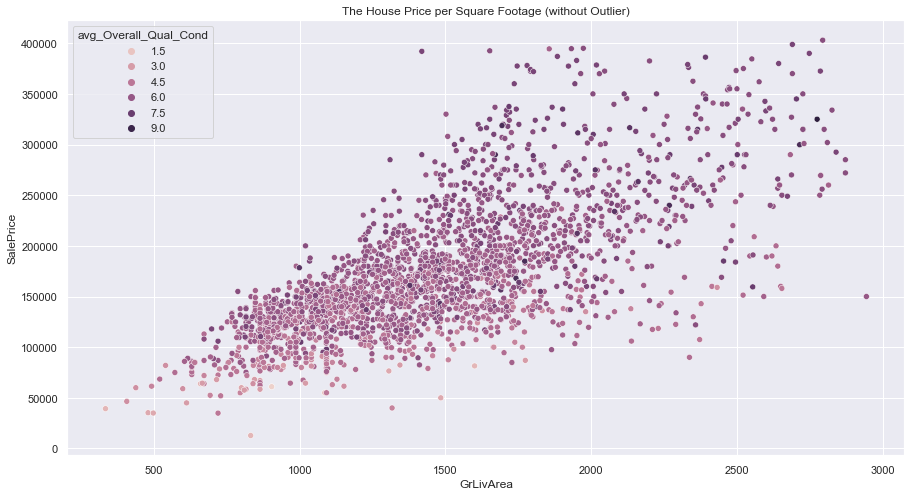

In [48]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = df, 
                x = 'GrLivArea',  
                y = 'SalePrice', 
                hue = 'avg_Overall_Qual_Cond').set(title = "The House Price per Square Footage (without Outlier)")

### Approach 2

In [49]:
#from sklearn.svm import OneClassSVM

# Fit one-class SVM on the selected columns
#svm = OneClassSVM(nu=0.045)  # adjust the nu parameter according to the data and our judgememt --> 4.5%
#svm.fit(housing[cols])

# Predict outliers
#outliers = svm.predict(housing[cols])
#housing['outlier'] = outliers

# Remove outliers from your dataframe
#df_2 = housing[housing['outlier'] == 1].drop(columns=['outlier'])

In [50]:
#df_2.shape

In [51]:
#sns.set(rc = {'figure.figsize':(15,8)})
#sns.boxplot(x='avg_Overall_Qual_Cond', y='SalePrice', data=df_2).set(title = "OverallQual vs. SP Boxplot")

In [52]:
#sns.set(rc = {'figure.figsize':(15,8)})
#sns.scatterplot(data = df_2, 
#                x = 'GrLivArea',  
#                y = 'SalePrice', 
#                hue = 'avg_Overall_Qual_Cond').set(title = "The House Price per Square Footage")

In [53]:
#df_2[df_2['GrLivArea']>4000]

In [54]:
df[['SalePrice' , 'TtlVal_AsrYr']].corr()

,SalePrice,TtlVal_AsrYr
SalePrice,1.000000,0.922847
TtlVal_AsrYr,0.922847,1.000000


In [55]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 day 19 hours 30 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.4
H2O_cluster_version_age:,9 months and 1 day !!!
H2O_cluster_name:,H2O_from_python_nimitsharma_2kw8o0
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.335 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [56]:
hf = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [57]:
hf = h2o.H2OFrame(housing)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [58]:
hf.head()

GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,CentralAir_Y,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,TtlVal_AsrYr,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax,avg_Overall_Qual_Cond,avg_Exter_Qual_Cond,avg_Bsmt_Qual_Cond,avg_Garage_Qual_Cond,MSZoning_R,Normal_Sale
856,126000,68.5161,7890,1939,1950,0,1,3,238,1,0,618,856,2,856,0,0,1,0,1,0,2,1,3,4,7,1,4,1939,2,399,0,0,0,0,166,0,0,0,0,3,2010,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,149000,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,6,3,3,3,True,1
1049,139500,42,4235,1984,1984,149,2,6,552,5,393,104,1049,2,1049,0,0,1,0,2,0,2,1,4,5,7,0,0,1984,1,266,0,105,0,0,0,0,0,0,0,2,2009,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,174100,11300,872772,77236.5,0.0204269,0.0132743,0.131858,0.0369214,0.111504,0.00629259,0.0017347,5,3.5,3.5,3,True,1
1001,124900,60,6060,1930,2007,0,1,5,737,1,0,100,837,4,1001,0,0,0,0,1,0,2,1,4,5,7,0,0,1930,1,216,154,0,42,86,0,0,0,0,0,11,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,164300,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,7,3.5,3,2,False,1
1039,114000,80,8146,1900,2003,0,1,1,0,1,0,405,405,3,717,322,0,0,0,1,0,2,1,3,6,7,0,0,1940,1,281,0,0,168,0,111,0,0,0,0,5,2009,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,124400,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,6,4,2.5,3,True,1
1665,227000,70,8400,2001,2001,0,1,6,643,1,0,167,810,4,810,855,0,1,0,2,1,3,1,4,6,7,0,0,2001,2,528,0,45,0,0,0,0,0,0,0,11,2009,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,257100,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,7,3.5,3.5,3,True,1
1922,198500,64,7301,2003,2003,500,0,0,0,0,0,0,0,4,495,1427,0,0,0,3,0,4,1,4,7,7,1,5,2003,2,672,0,0,177,0,0,0,0,0,0,7,2009,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,214800,11300,872772,77236.5,0.0204269,0.0132743,0.131858,0.0369214,0.111504,0.00629259,0.0017347,6,3.5,0,3,True,1
936,93000,60,6000,1953,1953,0,1,1,0,1,0,936,936,2,936,0,0,0,0,1,0,2,1,3,4,5,0,0,1974,2,576,0,32,112,0,0,0,0,0,0,2,2009,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,139300,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,4,2.5,2.5,3,True,1
1246,187687,53,3710,2007,2008,20,4,1,0,1,0,1146,1146,4,1246,0,0,0,0,2,0,2,1,4,5,7,1,4,2007,2,428,100,24,0,0,0,0,0,0,0,3,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,225500,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,6,3.5,3.5,3,True,0
889,137500,74,12395,1984,1984,0,1,5,647,1,0,217,86

In [59]:
hf.head()

GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,CentralAir_Y,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,TtlVal_AsrYr,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax,avg_Overall_Qual_Cond,avg_Exter_Qual_Cond,avg_Bsmt_Qual_Cond,avg_Garage_Qual_Cond,MSZoning_R,Normal_Sale
856,126000,68.5161,7890,1939,1950,0,1,3,238,1,0,618,856,2,856,0,0,1,0,1,0,2,1,3,4,7,1,4,1939,2,399,0,0,0,0,166,0,0,0,0,3,2010,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,149000,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,6,3,3,3,True,1
1049,139500,42,4235,1984,1984,149,2,6,552,5,393,104,1049,2,1049,0,0,1,0,2,0,2,1,4,5,7,0,0,1984,1,266,0,105,0,0,0,0,0,0,0,2,2009,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,174100,11300,872772,77236.5,0.0204269,0.0132743,0.131858,0.0369214,0.111504,0.00629259,0.0017347,5,3.5,3.5,3,True,1
1001,124900,60,6060,1930,2007,0,1,5,737,1,0,100,837,4,1001,0,0,0,0,1,0,2,1,4,5,7,0,0,1930,1,216,154,0,42,86,0,0,0,0,0,11,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,164300,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,7,3.5,3,2,False,1
1039,114000,80,8146,1900,2003,0,1,1,0,1,0,405,405,3,717,322,0,0,0,1,0,2,1,3,6,7,0,0,1940,1,281,0,0,168,0,111,0,0,0,0,5,2009,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,124400,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,6,4,2.5,3,True,1
1665,227000,70,8400,2001,2001,0,1,6,643,1,0,167,810,4,810,855,0,1,0,2,1,3,1,4,6,7,0,0,2001,2,528,0,45,0,0,0,0,0,0,0,11,2009,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,257100,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,7,3.5,3.5,3,True,1
1922,198500,64,7301,2003,2003,500,0,0,0,0,0,0,0,4,495,1427,0,0,0,3,0,4,1,4,7,7,1,5,2003,2,672,0,0,177,0,0,0,0,0,0,7,2009,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,214800,11300,872772,77236.5,0.0204269,0.0132743,0.131858,0.0369214,0.111504,0.00629259,0.0017347,6,3.5,0,3,True,1
936,93000,60,6000,1953,1953,0,1,1,0,1,0,936,936,2,936,0,0,0,0,1,0,2,1,3,4,5,0,0,1974,2,576,0,32,112,0,0,0,0,0,0,2,2009,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,139300,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,4,2.5,2.5,3,True,1
1246,187687,53,3710,2007,2008,20,4,1,0,1,0,1146,1146,4,1246,0,0,0,0,2,0,2,1,4,5,7,1,4,2007,2,428,100,24,0,0,0,0,0,0,0,3,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,225500,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,6,3.5,3.5,3,True,0
889,137500,74,12395,1984,1984,0,1,5,647,1,0,217,86

In [60]:
hf.columns

['GrLivArea',
 'SalePrice',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotShape_Reg',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'BldgTy

In [61]:
hf.head()

GrLivArea,SalePrice,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,CentralAir_Y,Electrical_SBrkr,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,TtlVal_AsrYr,total_returns,adj_gross_inc,agi_per_ret,perc_business_ret,perc_farm_ret,perc_umemp_ret,perc_ssn_benefits,perc_student_loans,perc_child_credits,Perc_earned_inc_tax,avg_Overall_Qual_Cond,avg_Exter_Qual_Cond,avg_Bsmt_Qual_Cond,avg_Garage_Qual_Cond,MSZoning_R,Normal_Sale
856,126000,68.5161,7890,1939,1950,0,1,3,238,1,0,618,856,2,856,0,0,1,0,1,0,2,1,3,4,7,1,4,1939,2,399,0,0,0,0,166,0,0,0,0,3,2010,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,149000,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,6,3,3,3,True,1
1049,139500,42,4235,1984,1984,149,2,6,552,5,393,104,1049,2,1049,0,0,1,0,2,0,2,1,4,5,7,0,0,1984,1,266,0,105,0,0,0,0,0,0,0,2,2009,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,174100,11300,872772,77236.5,0.0204269,0.0132743,0.131858,0.0369214,0.111504,0.00629259,0.0017347,5,3.5,3.5,3,True,1
1001,124900,60,6060,1930,2007,0,1,5,737,1,0,100,837,4,1001,0,0,0,0,1,0,2,1,4,5,7,0,0,1930,1,216,154,0,42,86,0,0,0,0,0,11,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,164300,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,7,3.5,3,2,False,1
1039,114000,80,8146,1900,2003,0,1,1,0,1,0,405,405,3,717,322,0,0,0,1,0,2,1,3,6,7,0,0,1940,1,281,0,0,168,0,111,0,0,0,0,5,2009,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,124400,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,6,4,2.5,3,True,1
1665,227000,70,8400,2001,2001,0,1,6,643,1,0,167,810,4,810,855,0,1,0,2,1,3,1,4,6,7,0,0,2001,2,528,0,45,0,0,0,0,0,0,0,11,2009,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,257100,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,7,3.5,3.5,3,True,1
1922,198500,64,7301,2003,2003,500,0,0,0,0,0,0,0,4,495,1427,0,0,0,3,0,4,1,4,7,7,1,5,2003,2,672,0,0,177,0,0,0,0,0,0,7,2009,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,214800,11300,872772,77236.5,0.0204269,0.0132743,0.131858,0.0369214,0.111504,0.00629259,0.0017347,6,3.5,0,3,True,1
936,93000,60,6000,1953,1953,0,1,1,0,1,0,936,936,2,936,0,0,0,0,1,0,2,1,3,4,5,0,0,1974,2,576,0,32,112,0,0,0,0,0,0,2,2009,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,139300,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,4,2.5,2.5,3,True,1
1246,187687,53,3710,2007,2008,20,4,1,0,1,0,1146,1146,4,1246,0,0,0,0,2,0,2,1,4,5,7,1,4,2007,2,428,100,24,0,0,0,0,0,0,0,3,2008,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,225500,14090,1.03662e+06,73571.3,0.0213087,0.0113556,0.134138,0.0524377,0.107168,0.0064035,0.00216569,6,3.5,3.5,3,True,0
889,137500,74,12395,1984,1984,0,1,5,647,1,0,217,86

In [62]:
2023 - hf['YearBuilt'].max()

13.0

In [63]:
hf['YearRemodAdd'].max()

2010.0

In [64]:
hf['house_age'] = 2023 - hf['YearBuilt']

In [65]:
hf['remodel_age'] = 2023 - hf['YearRemodAdd']

In [66]:
hf['sale_age'] = 2023 - hf['YrSold'] + (4 - hf['MoSold'])/12

In [67]:
hf = hf.drop(['YearBuilt','YearRemodAdd','YrSold','MoSold'])

In [68]:
train, valid, test = hf.split_frame(ratios=[0.6,0.2], seed=1234)
response = "SalePrice"
train[response] = train[response]
valid[response] = valid[response]
test[response] = test[response]
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  1547 532 503


In [69]:
aml = H2OAutoML(max_models =10,
                balance_classes=True, seed =1)

In [70]:
aml.train(training_frame = train, y = 'SalePrice')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_2_20230505_112117

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 38648919.19628382
RMSE: 6216.8254918634975
MAE: 4378.785170550502
RMSLE: 0.03894358087189993
R^2: 0.9928875890261626
Mean Residual Deviance: 38648919.19628382
Null degrees of freedom: 1546
Residual degrees of freedom: 1538
Null deviance: 8406414957822.975
Residual deviance: 59789877996.65106
AIC: 31436.331255165314

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 362355997.586812
RMSE: 19035.65070037828
MAE: 12098.809845187348
RMSLE: 0.10702675360518207
R^2: 0.9333170285931295
Mean Residual Deviance: 362355997.586812
Null degrees of freedom: 1546
Residual degrees of freedom: 1538
Null deviance: 8408823532859.219
Res

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.205663e+04,3.607653e+02,1.180752e+04,1.227252e+04,1.157355e+04,1.246525e+04,1.216432e+04
1,mean_residual_deviance,3.601957e+08,6.562696e+07,2.961859e+08,4.343506e+08,2.954556e+08,3.562701e+08,4.187166e+08
2,mse,3.601957e+08,6.562696e+07,2.961859e+08,4.343506e+08,2.954556e+08,3.562701e+08,4.187166e+08
3,null_deviance,1.681765e+12,2.527148e+11,1.692851e+12,1.876538e+12,1.435207e+12,1.423026e+12,1.981203e+12
4,r2,9.335507e-01,8.187083e-03,9.458638e-01,9.274898e-01,9.349284e-01,9.247981e-01,9.346731e-01
5,residual_deviance,1.114203e+11,2.041486e+10,9.152144e+10,1.359517e+11,9.336396e+10,1.068810e+11,1.293834e+11
6,rmse,1.891553e+04,1.731536e+03,1.721005e+04,2.084108e+04,1.718882e+04,1.887512e+04,2.046256e+04
7,rmsle,1.065308e-01,7.413242e-03,1.014337e-01,1.043971e-01,9.840473e-02,1.158442e-01,1.125740e-01


In [71]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_2_20230505_112117,19035.7,3.62356e+08,12098.8,0.107027,3.62356e+08
StackedEnsemble_BestOfFamily_1_AutoML_2_20230505_112117,19067.3,3.63564e+08,12312.5,0.108386,3.63564e+08
GBM_3_AutoML_2_20230505_112117,19701.3,3.88141e+08,12624.8,0.110051,3.88141e+08
GBM_4_AutoML_2_20230505_112117,20032.9,4.01319e+08,12590.3,0.112404,4.01319e+08
XGBoost_3_AutoML_2_20230505_112117,20224.8,4.09044e+08,13786.2,0.114809,4.09044e+08
XRT_1_AutoML_2_20230505_112117,20227.6,4.09157e+08,12972.9,0.117621,4.09157e+08
DRF_1_AutoML_2_20230505_112117,20257.9,4.10382e+08,12859.8,0.11686,4.10382e+08
GBM_2_AutoML_2_20230505_112117,20696.7,4.28352e+08,12923.4,0.115229,4.28352e+08
XGBoost_2_AutoML_2_20230505_112117,21365.3,4.56475e+08,14210.2,0.118596,4.56475e+08
XGBoost_1_AutoML_2_20230505_112117,21990.8,4.83595e+08,14595.3,0.120682,4.83595e+08


In [72]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_2_20230505_112117

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 38648919.19628382
RMSE: 6216.8254918634975
MAE: 4378.785170550502
RMSLE: 0.03894358087189993
R^2: 0.9928875890261626
Mean Residual Deviance: 38648919.19628382
Null degrees of freedom: 1546
Residual degrees of freedom: 1538
Null deviance: 8406414957822.975
Residual deviance: 59789877996.65106
AIC: 31436.331255165314

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 362355997.586812
RMSE: 19035.65070037828
MAE: 12098.809845187348
RMSLE: 0.10702675360518207
R^2: 0.9333170285931295
Mean Residual Deviance: 362355997.586812
Null degrees of freedom: 1546
Residual degrees of freedom: 1538
Null deviance: 8408823532859.219
Residual deviance: 560564728266.7982
AIC: 34898.684851832375

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.205663e+04,3.607653e+02,1.180752e+04,1.227252e+04,1.157355e+04,1.246525e+04,1.216432e+04
1,mean_residual_deviance,3.601957e+08,6.562696e+07,2.961859e+08,4.343506e+08,2.954556e+08,3.562701e+08,4.187166e+08
2,mse,3.601957e+08,6.562696e+07,2.961859e+08,4.343506e+08,2.954556e+08,3.562701e+08,4.187166e+08
3,null_deviance,1.681765e+12,2.527148e+11,1.692851e+12,1.876538e+12,1.435207e+12,1.423026e+12,1.981203e+12
4,r2,9.335507e-01,8.187083e-03,9.458638e-01,9.274898e-01,9.349284e-01,9.247981e-01,9.346731e-01
5,residual_deviance,1.114203e+11,2.041486e+10,9.152144e+10,1.359517e+11,9.336396e+10,1.068810e+11,1.293834e+11
6,rmse,1.891553e+04,1.731536e+03,1.721005e+04,2.084108e+04,1.718882e+04,1.887512e+04,2.046256e+04
7,rmsle,1.065308e-01,7.413242e-03,1.014337e-01,1.043971e-01,9.840473e-02,1.158442e-01,1.125740e-01


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20230505_112117,19035.7,3.62356e+08,12098.8,0.107027,3.62356e+08,372,0.041915,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230505_112117,19067.3,3.63564e+08,12312.5,0.108386,3.63564e+08,379,0.019988,StackedEnsemble
GBM_3_AutoML_2_20230505_112117,19701.3,3.88141e+08,12624.8,0.110051,3.88141e+08,1114,0.014862,GBM
GBM_4_AutoML_2_20230505_112117,20032.9,4.01319e+08,12590.3,0.112404,4.01319e+08,2160,0.015403,GBM
XGBoost_3_AutoML_2_20230505_112117,20224.8,4.09044e+08,13786.2,0.114809,4.09044e+08,304,0.00329,XGBoost
XRT_1_AutoML_2_20230505_112117,20227.6,4.09157e+08,12972.9,0.117621,4.09157e+08,4944,0.017396,DRF
DRF_1_AutoML_2_20230505_112117,20257.9,4.10382e+08,12859.8,0.11686,4.10382e+08,2839,0.016014,DRF
GBM_2_AutoML_2_20230505_112117,20696.7,4.28352e+08,12923.4,0.115229,4.28352e+08,727,0.013837,GBM
XGBoost_2_AutoML_2_20230505_112117,21365.3,4.56475e+08,14210.2,0.118596,4.56475e+08,473,0.004775,XGBoost
XGBoost_1_AutoML_2_20230505_112117,21990.8,4.83595e+08,14595.3,0.120682,4.83595e+08,641,0.005111,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

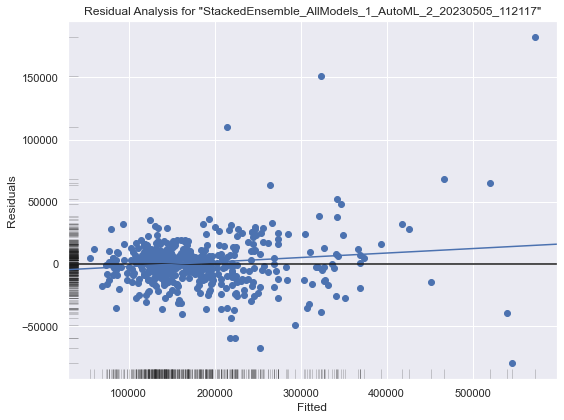

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

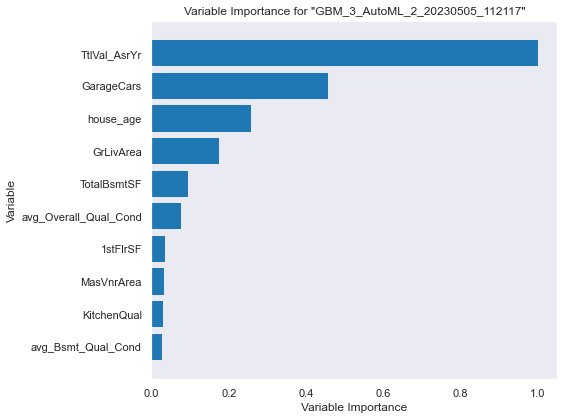

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

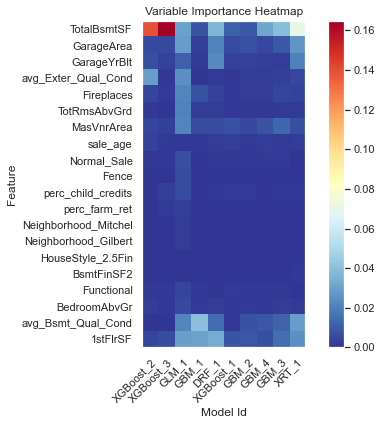

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

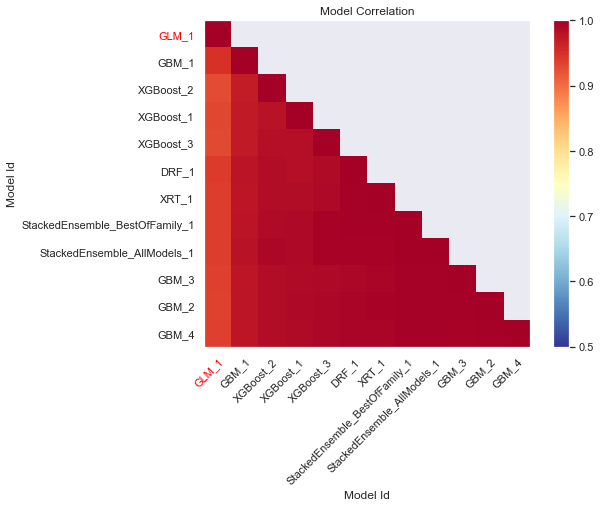

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

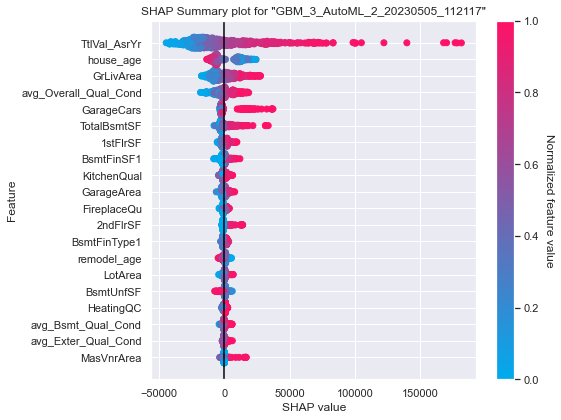

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

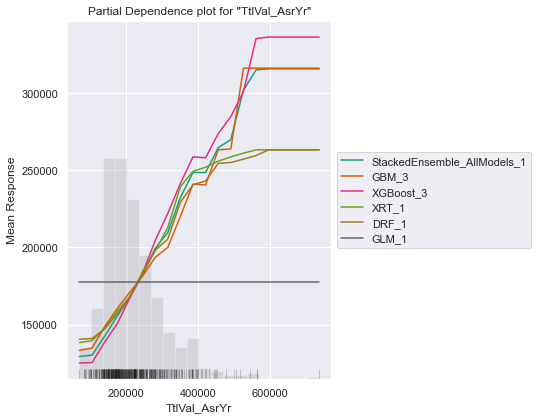

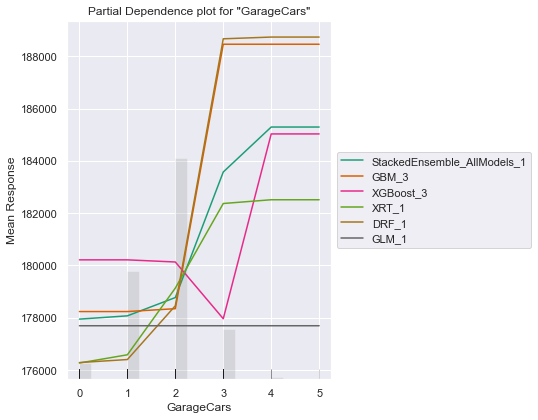

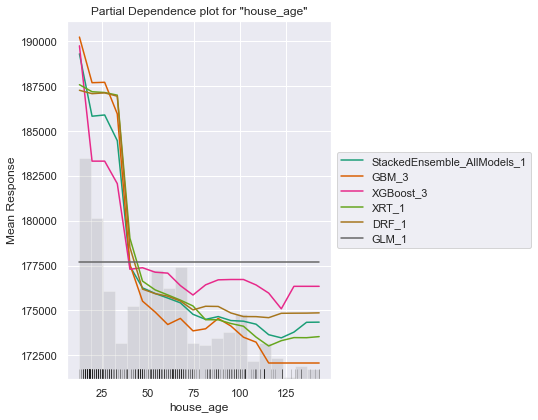

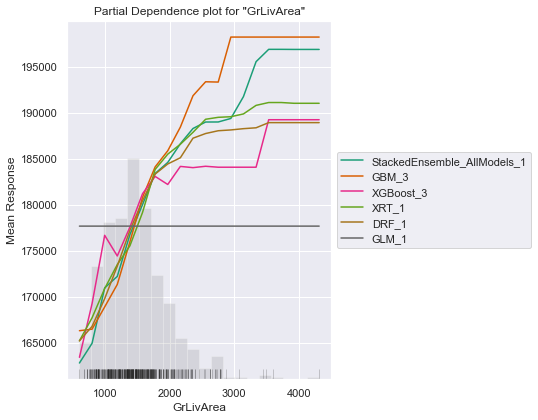

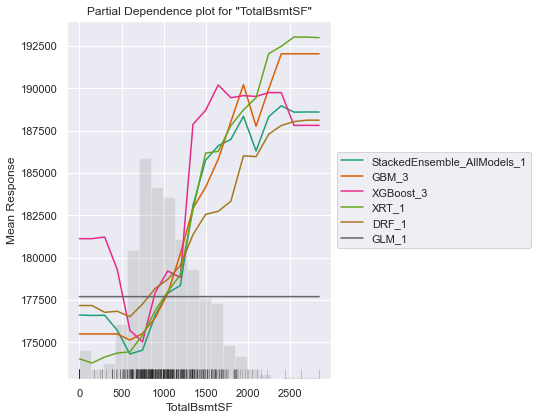

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

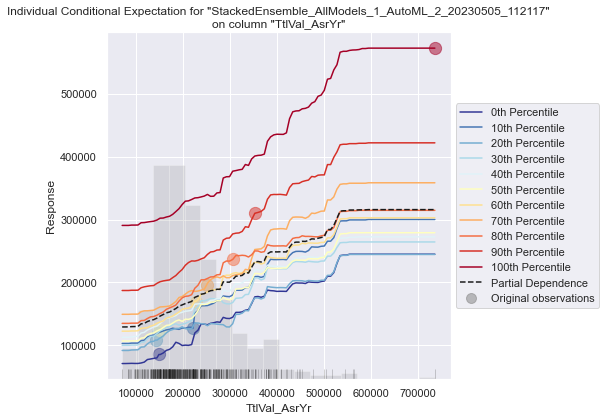

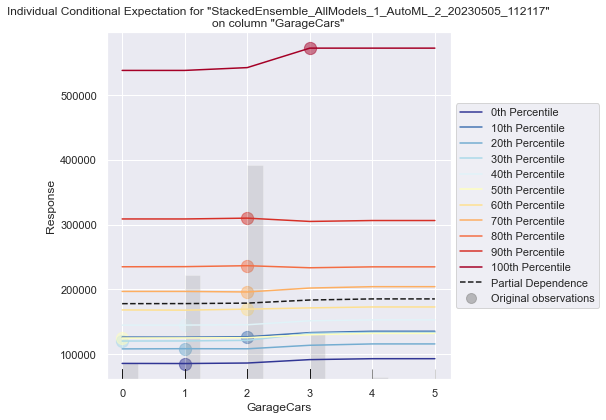

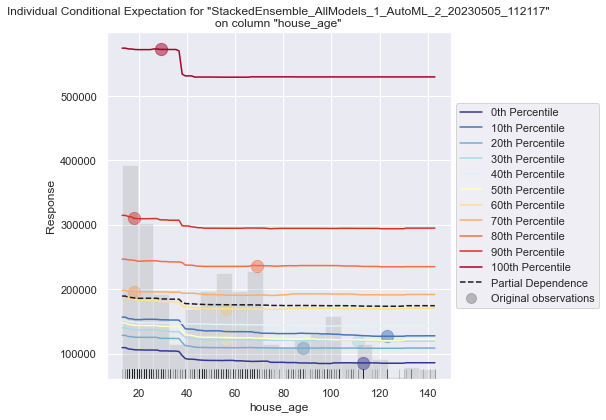

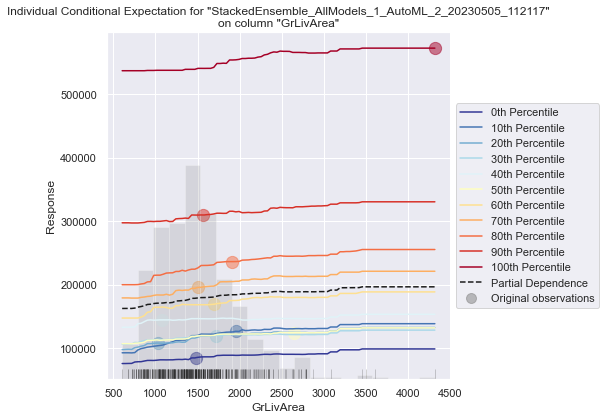

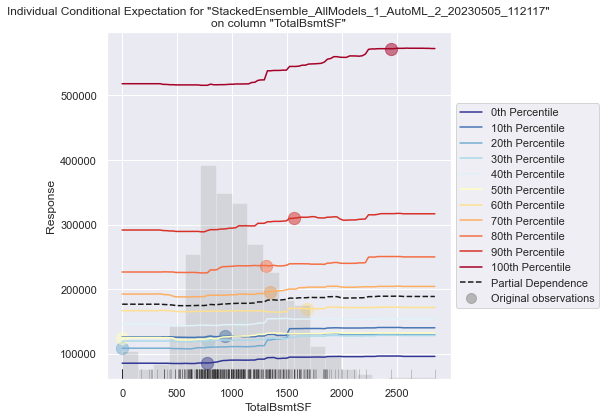

In [73]:
explain_model = aml.explain(frame = test, figsize = (8,6))

In [74]:
predictors = ['GrLivArea',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'LotShape_Reg',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'MasVnrType_BrkFace',
 'MasVnrType_Stone',
 'Foundation_CBlock',
 'Foundation_PConc',
 'CentralAir_Y',
 'Electrical_SBrkr',
 'GarageType_Attchd',
 'GarageType_BuiltIn',
 'GarageType_Detchd',
 'TtlVal_AsrYr',
 'total_returns',
 'adj_gross_inc',
 'agi_per_ret',
 'perc_business_ret',
 'perc_farm_ret',
 'perc_umemp_ret',
 'perc_ssn_benefits',
 'perc_student_loans',
 'perc_child_credits',
 'Perc_earned_inc_tax',
 'avg_Overall_Qual_Cond',
 'avg_Exter_Qual_Cond',
 'avg_Bsmt_Qual_Cond',
 'avg_Garage_Qual_Cond',
 'MSZoning_R',
 'Normal_Sale',
 'house_age',
 'remodel_age',
 'sale_age']

### Building GBM Model without Auto ML

In [75]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm = H2OGradientBoostingEstimator()
# train with the initialized model
gbm.train(x=predictors, y='SalePrice', training_frame=train)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1683109233182_27


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,16458.0,5.0,5.0,5.0,7.0,28.0,21.5




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 129333405.93248779
RMSE: 11372.484598032559
MAE: 8126.997192146089
RMSLE: 0.07138725811572112
Mean Residual Deviance: 129333405.93248779

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2023-05-05 11:23:34,0.108 sec,0.0,73715.744327,54170.222988,5.434011e+09
1,,2023-05-05 11:23:34,0.196 sec,1.0,67040.729881,49199.272130,4.494459e+09
2,,2023-05-05 11:23:34,0.225 sec,2.0,61135.237803,44750.536381,3.737517e+09
3,,2023-05-05 11:23:34,0.243 sec,3.0,55849.901040,40773.121414,3.119211e+09
4,,2023-05-05 11:23:34,0.278 sec,4.0,51104.013851,37167.036199,2.611620e+09
5,,2023-05-05 11:23:34,0.304 sec,5.0,46885.636081,33952.878050,2.198263e+09
6,,2023-05-05 11:23:34,0.344 sec,6.0,43155.403663,31088.204246,1.862389e+09
7,,2023-05-05 11:23:34,0.359 sec,7.0,39844.279850,28572.543613,1.587567e+09
8,,2023-05-05 11:23:34,0.388 sec,8.0,36812.502305,26311.670683,1.355160e+09
9,,2023-05-05 11:23:34,0.407 sec,9.0,34093.800696,24273.777695,1.162387e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TtlVal_AsrYr,3.825056e+13,1.000000,0.885593
1,avg_Overall_Qual_Cond,6.827778e+11,0.017850,0.015808
2,TotalBsmtSF,5.985111e+11,0.015647,0.013857
3,GrLivArea,5.221627e+11,0.013651,0.012089
4,GarageYrBlt,3.884342e+11,0.010155,0.008993
5,BsmtFinSF1,2.878595e+11,0.007526,0.006665
6,house_age,2.646012e+11,0.006918,0.006126
7,MasVnrArea,1.939549e+11,0.005071,0.004491
8,BsmtFinType1,1.822082e+11,0.004764,0.004219
9,remodel_age,1.793011e+11,0.004688,0.004151



See the whole table with table.as_data_frame()


In [76]:
gbm.summary()


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,16458.0,5.0,5.0,5.0,7.0,28.0,21.5


In [77]:
print(gbm.model_performance(train))


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 129333432.59410563
RMSE: 11372.485770230958
MAE: 8126.997875753535
RMSLE: 0.07138727710203141
Mean Residual Deviance: 129333432.59410563



In [78]:
print(gbm.model_performance(valid))


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 740805738.4960214
RMSE: 27217.74675640916
MAE: 14169.78306347087
RMSLE: 0.1524478360578452
Mean Residual Deviance: 740805738.4960214



### Model Tuning

In [79]:
tuned_gbm  = H2OGradientBoostingEstimator(
    ntrees = 100,
    learn_rate = 0.02,
    stopping_rounds = 25,
    stopping_metric = "deviance",
    col_sample_rate = 0.65,
    sample_rate = 0.65,
    seed = 61
)      
tuned_gbm.train(x=predictors, y='SalePrice', training_frame=train, validation_frame=valid)

gbm Model Build progress: |

/Users/nimitsharma/opt/anaconda3/lib/python3.9/site-packages/h2o/estimators/estimator_base.py:208: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1683109233182_28


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,35877.0,5.0,5.0,5.0,20.0,28.0,23.84




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 386293431.504144
RMSE: 19654.348920891378
MAE: 13002.319984243697
RMSLE: 0.1188311155322114
Mean Residual Deviance: 386293431.504144

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 757408706.3887508
RMSE: 27521.059325337585
MAE: 16524.56340174735
RMSLE: 0.17950420671126002
Mean Residual Deviance: 757408706.3887508

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2023-05-05 11:23:36,0.014 sec,0.0,73715.744327,54170.222988,5.434011e+09,73316.846506,54571.782335,5.375360e+09
1,,2023-05-05 11:23:36,0.040 sec,1.0,72410.427738,53184.300228,5.243270e+09,72079.616245,53592.402305,5.195471e+09
2,,2023-05-05 11:23:36,0.054 sec,2.0,71143.216333,52205.237476,5.061357e+09,70881.242765,52630.972178,5.024151e+09
3,,2023-05-05 11:23:36,0.068 sec,3.0,69850.419532,51229.986880,4.879081e+09,69611.104567,51666.070107,4.845706e+09
4,,2023-05-05 11:23:36,0.082 sec,4.0,68644.194362,50314.404260,4.712025e+09,68457.840658,50777.737988,4.686476e+09
5,,2023-05-05 11:23:36,0.098 sec,5.0,67460.745727,49430.275301,4.550952e+09,67324.055004,49904.951769,4.532528e+09
6,,2023-05-05 11:23:36,0.114 sec,6.0,66272.669687,48533.389827,4.392067e+09,66218.671376,49045.121086,4.384912e+09
7,,2023-05-05 11:23:36,0.129 sec,7.0,65114.336715,47657.739324,4.239877e+09,65092.380876,48190.163983,4.237018e+09
8,,2023-05-05 11:23:36,0.140 sec,8.0,63959.472004,46791.775180,4.090814e+09,64007.626080,47360.861482,4.096976e+09
9,,2023-05-05 11:23:36,0.160 sec,9.0,62844.195169,45959.474426,3.949393e+09,63014.591498,46579.246095,3.970839e+09



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,TtlVal_AsrYr,1.121655e+14,1.000000,0.672772
1,house_age,2.221526e+13,0.198058,0.133248
2,GarageCars,9.203188e+12,0.082050,0.055201
3,GrLivArea,5.644763e+12,0.050325,0.033857
4,avg_Overall_Qual_Cond,4.458389e+12,0.039748,0.026742
5,TotalBsmtSF,2.705169e+12,0.024118,0.016226
6,BsmtFinSF1,1.415857e+12,0.012623,0.008492
7,1stFlrSF,1.323951e+12,0.011804,0.007941
8,GarageArea,1.319387e+12,0.011763,0.007914
9,KitchenQual,5.571674e+11,0.004967,0.003342



See the whole table with table.as_data_frame()


In [80]:
from h2o.grid.grid_search import H2OGridSearch
grid_search_gbm = H2OGradientBoostingEstimator(
    stopping_rounds = 50,
    stopping_metric = "deviance",
    seed = 61
) 

hyper_params = {
    'learn_rate':[0.01, 0.02, 0.03],
    'max_depth':[4,8,10,12,16],
    'sample_rate': [0.8, 1.0],
    'col_sample_rate': [0.2, 0.5, 0.8, 1.0],
    'ntrees':[50, 60, 80, 100, 120]}

grid = H2OGridSearch(grid_search_gbm, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={
                             "strategy": "RandomDiscrete",
                             "max_runtime_secs": 600,
                             "max_models": 100,
                             "stopping_metric": "AUTO",
                             "stopping_tolerance": 0.00001,
                             "stopping_rounds": 5,
                             "seed": 123456})
#Train grid search
grid.train(x=predictors, 
           y='SalePrice',
           training_frame=train,
           validation_frame=valid)

H2OResponseError: Server error water.exceptions.H2OIllegalArgumentException:
  Error: Illegal argument: training_frame of function: grid: Cannot append new models to a grid with different training input
  Request: POST /99/Grid/gbm
    data: {'search_criteria': '{"strategy": RandomDiscrete,"max_runtime_secs": 600,"max_models": 100,"stopping_metric": AUTO,"stopping_tolerance": 1e-05,"stopping_rounds": 5,"seed": 123456}', 'parallelism': '1', 'hyper_parameters': '{"learn_rate": [0.01,0.02,0.03],"max_depth": [4,8,10,12,16],"sample_rate": [0.8,1.0],"col_sample_rate": [0.2,0.5,0.8,1.0],"ntrees": [50,60,80,100,120]}', 'nfolds': '0', 'keep_cross_validation_models': 'True', 'keep_cross_validation_predictions': 'False', 'keep_cross_validation_fold_assignment': 'False', 'score_each_iteration': 'False', 'score_tree_interval': '0', 'fold_assignment': 'auto', 'ignore_const_cols': 'True', 'balance_classes': 'False', 'max_after_balance_size': '5.0', 'max_confusion_matrix_size': '20', 'ntrees': '50', 'max_depth': '5', 'min_rows': '10.0', 'nbins': '20', 'nbins_top_level': '1024', 'nbins_cats': '1024', 'stopping_rounds': '50', 'stopping_metric': 'deviance', 'stopping_tolerance': '0.001', 'max_runtime_secs': '0.0', 'seed': '61', 'build_tree_one_node': 'False', 'learn_rate': '0.1', 'learn_rate_annealing': '1.0', 'distribution': 'auto', 'quantile_alpha': '0.5', 'tweedie_power': '1.5', 'huber_alpha': '0.9', 'sample_rate': '1.0', 'col_sample_rate': '1.0', 'col_sample_rate_change_per_level': '1.0', 'col_sample_rate_per_tree': '1.0', 'min_split_improvement': '1e-05', 'histogram_type': 'auto', 'pred_noise_bandwidth': '0.0', 'categorical_encoding': 'auto', 'calibrate_model': 'False', 'check_constant_response': 'True', 'gainslift_bins': '-1', 'auc_type': 'auto', 'training_frame': 'py_14_sid_952c', 'validation_frame': 'py_248_sid_952c', 'response_column': 'SalePrice', 'grid_id': 'depth_grid'}


In [ ]:
grid_sorted = grid.get_grid(sort_by='mae',decreasing=False)

In [ ]:
print(grid_sorted)

In [ ]:
best_gbm = grid_sorted.models[0]

In [ ]:
print(best_gbm)

In [ ]:
best_gbm.varimp_plot()

In [ ]:
pred_val = (best_gbm.predict(test[predictors])[0]).as_data_frame()
true_val = (test['SalePrice']).as_data_frame()

In [ ]:
prediction_df = pd.concat([pred_val,true_val],axis=1)
prediction_df

In [ ]:
np.sum(abs(prediction_df['predict']-prediction_df['SalePrice']))/503

In [ ]:
prediction_df[(prediction_df['predict'] > prediction_df['SalePrice'])]

In [ ]:
test.head()

In [ ]:
housing[(housing['GrLivArea']==864) & (housing['SalePrice']==67000)]